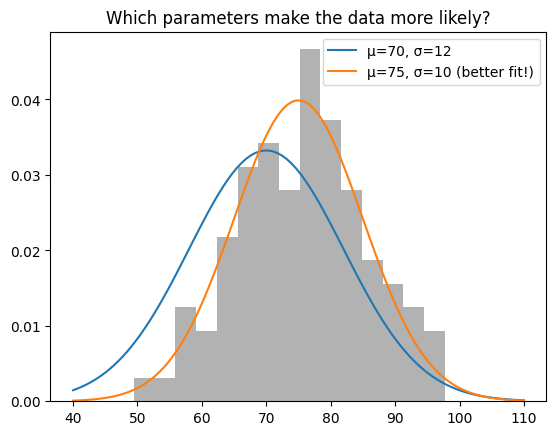

In [2]:
##############################################################################
# Finding mean and stdev that best describe a normaly distributed dataset
###############################################################################


# Importing necessary libraries
import numpy as np                  # Imports NumPy for numerical operations, random number generation, and arrays.
import matplotlib.pyplot as plt     # Imports Matplotlib’s pyplot for creating visualizations like histograms and plots.
from scipy.stats import norm        # Imports the 'norm' class from SciPy for working with normal (Gaussian) distributions.

# Setting the random seed for reproducibility
np.random.seed(0)                   # Ensures that the random numbers generated are the same each time you run the code.

# Generating random data from a normal distribution
data = np.random.normal(loc=75, scale=10, size=100)
# 'loc' = mean (μ) of the normal distribution → 75
# 'scale' = standard deviation (σ) → 10
# 'size' = number of random data points → 100
# The result is a NumPy array of 100 normally distributed numbers around mean 75.

# Plotting a histogram of the generated data
plt.hist(data, bins=15, density=True, alpha=0.6, color='gray')
# 'bins=15' → divides the range of data into 15 intervals (bars)
# 'density=True' → normalizes the histogram so total area = 1 (making it comparable to a probability density function)
# 'alpha=0.6' → sets transparency level (1 = opaque, 0 = fully transparent)
# 'color="gray"' → sets the color of histogram bars to gray

# Creating a range of x values to evaluate the normal PDF
x = np.linspace(40, 110, 100)
# 'np.linspace(start, stop, num)' creates 100 evenly spaced values from 40 to 110
# These x-values will be used to plot theoretical normal distributions.

# Plotting a normal distribution curve with mean = 70 and std = 12
plt.plot(x, norm.pdf(x, 70, 12), label='μ=70, σ=12')
# 'norm.pdf(x, mean, std)' computes the probability density function values
# at each x for a normal distribution with mean 70 and std deviation 12.
# 'plt.plot()' plots the smooth curve.
# 'label' adds text for the legend.

# Plotting another normal distribution curve with mean = 75 and std = 10
plt.plot(x, norm.pdf(x, 75, 10), label='μ=75, σ=10 (better fit!)')
# This curve uses parameters that better fit the generated data.

# Adding a legend to distinguish between plotted curves
plt.legend()
# Displays the labels defined above on the plot.

# Adding a title to the plot
plt.title('Which parameters make the data more likely?')
# Gives context — illustrating that MLE finds parameter values (μ, σ)
# that make observed data most probable.

# Displaying the final plot
plt.show()
# Renders the histogram and both normal distribution curves together.





In [11]:
############################################################
#                 Finding the Best Parameters
#############################################################

# Importing the optimization function
from scipy.optimize import minimize
# 'minimize' is a powerful function from SciPy used to find the parameter values that minimize (or equivalently, maximize the negative of) a given function.

# Defining the negative log-likelihood function
def neg_log_likelihood(params):
    # The function takes a list or array 'params' containing two parameters: mean (μ) and standard deviation (σ)
    mu, sigma = params

    # 'norm.logpdf(data, mu, sigma)' computes the logarithm of the probability density of each data point in 'data' given parameters μ and σ.
    # Summing these gives the total log-likelihood of the data under this distribution.
    # Since we want to *maximize* likelihood, but 'minimize' only minimizes,
    # we return the *negative* of the log-likelihood.
    return -np.sum(norm.logpdf(data, mu, sigma))
    # data was defined in th previous code cell

# Using the minimize function to find μ and σ that minimize the negative log-likelihood
result = minimize(neg_log_likelihood, x0=[70, 10])
# 'neg_log_likelihood' → the function we want to minimize
# 'x0=[70, 10]' → the initial guess for parameters (μ=70, σ=10)
# The optimizer adjusts μ and σ iteratively to find the values that minimize the negative log-likelihood,
# i.e., the values that *maximize* the likelihood itself — the essence of MLE.

# Displaying the estimated parameters
print(result.x)  # MLE estimates for μ and σ
# 'result.x' returns an array containing the optimal μ (mean) and σ (standard deviation)
# These are the Maximum Likelihood Estimates that best fit the observed data.



[75.59808073 10.07882329]


In [12]:
###############################################################
# MLE for nor-normal (poisson distrubution) data
###############################################################


# Import the Poisson distribution class from SciPy
from scipy.stats import poisson
# 'poisson' provides probability functions (PMF, logPMF, etc.)
# for the Poisson distribution — commonly used for modeling
# counts of events occurring within a fixed interval.

# Generate synthetic count data from a Poisson distribution
counts = np.random.poisson(lam=3, size=100)
# 'lam=3' sets the true rate parameter λ (average number of events)
# 'size=100' generates 100 random counts following this distribution.
# The resulting 'counts' array mimics observed event frequencies.

# Define the negative log-likelihood function for Poisson distribution
def neg_log_likelihood_poisson(lam):
    # Given a candidate λ, compute how likely the observed counts are.
    # 'poisson.logpmf(counts, lam)' returns the log of the probability
    # of each observed count under λ.
    # Summing these gives total log-likelihood; the negative sign
    # converts it to a quantity we can minimize.
    return -np.sum(poisson.logpmf(counts, lam))

# Use SciPy’s optimizer to find λ that minimizes the negative log-likelihood
res = minimize(lambda x: neg_log_likelihood_poisson(x[0]), x0=[1])
# 'lambda x: ...' defines an inline (anonymous) function that extracts λ
# from the parameter vector 'x' because 'minimize' expects an iterable input.
# 'x0=[1]' gives the starting guess for λ (initial value λ₀ = 1).
# The optimizer iteratively adjusts λ to find the value that minimizes
# the negative log-likelihood — i.e., maximizes the likelihood.

# Print the Maximum Likelihood Estimate for λ
print('MLE λ =', res.x[0])
# 'res.x' is the array of optimized parameters found by 'minimize'.
# 'res.x[0]' extracts the single best-fit λ value.

# Conceptual explanation:
# Poisson MLE finds the λ (rate of events) that makes the observed
# count pattern most likely under the Poisson model.


MLE λ = 2.9900000628370527


In [13]:
###############################################################
# MLE for binary data
###############################################################

# Import the StatsModels library
import statsmodels.api as sm
# 'statsmodels' is a Python library used for statistical modeling,
# including regression, hypothesis testing, and time series analysis.
# Here we’ll use it to perform logistic regression.

# Generate random predictor (independent variable) data
X = np.random.randn(100, 1)
# Creates a 100 x 1 (100 rows, 1 column) array of random numbers drawn from a standard normal distribution (mean=0, std=1).
# This acts as our single explanatory variable.

# Add a constant column to X for the intercept term (β₀)
X = sm.add_constant(X)
# 'add_constant' prepends a column of ones to X, allowing the model
# to estimate both an intercept (β₀) and a slope (β₁).

# Generate a binary dependent variable y (0s and 1s)
y = (X[:,1] + np.random.randn(100) > 0).astype(int)
# 'X[:,1]' extracts the variable column (excluding the constant).
# We add random noise to it with 'np.random.randn(100)'.
# The expression '> 0' converts values into True (1) or False (0),
# creating a binary outcome variable.
# '.astype(int)' converts the boolean values to integers (0 and 1).

# Define the logistic regression model
model = sm.Logit(y, X)
# 'sm.Logit' specifies a logistic regression model where:
# - y = dependent variable (binary: 0 or 1)
# - X = independent variables (includes constant term)
# Logistic regression models the probability that y=1 using the logistic function.

# Fit the model using Maximum Likelihood Estimation (MLE)
result = model.fit()
# The 'fit()' method estimates coefficients (β₀, β₁) that maximize
# the likelihood of observing the actual pattern of 0s and 1s.
# Internally, StatsModels uses MLE optimization for logistic regression.

# Print a detailed summary of model results
print(result.summary())
# Displays regression coefficients, standard errors, z-scores, p-values,
# confidence intervals, and overall model fit statistics.

# Conceptual explanation:
# Logistic regression internally uses MLE to find the parameter values (β₀, β₁)
# that maximize the probability of observing the given binary outcomes (0s and 1s).


Optimization terminated successfully.
         Current function value: 0.426635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Oct 2025   Pseudo R-squ.:                  0.3800
Time:                        18:40:44   Log-Likelihood:                -42.664
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 4.762e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3428      0.274     -1.252      0.210      -0.879       0.194
x1             2.3414      0.